In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df_partidos = pd.read_csv('datos_cebollitas.csv')

df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [3]:
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

df_partidos[['goles_local', 'goles_visitante', 'diferencia_goles']].head()

,goles_local,goles_visitante,diferencia_goles
0,2,0,2
1,1,5,-4
2,1,0,1
3,2,3,-1
4,5,3,2


In [4]:
df_partidos['ratio_tiros_posesion_local'] = df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']

df_partidos[['tiros_arco_local', 'posesion_local (%)', 'ratio_tiros_posesion_local']].head()

,tiros_arco_local,posesion_local (%),ratio_tiros_posesion_local
0,12,54,0.222222
1,12,60,0.200000
2,10,55,0.181818
3,3,57,0.052632
4,7,52,0.134615


In [5]:
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_tiros_posesion_local
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2,0.222222
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4,0.200000
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1,0.052632
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2,0.134615


In [6]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df_partidos[['posesion_local (%)', 'tiros_arco_local', 'ratio_tiros_posesion_local']]

y = df_partidos['goles_local']

selector = SelectKBest(score_func=f_regression, k=2)
selector.fit(X, y)

scores = selector.scores_
variables = X.columns

resultados =pd.DataFrame({'Variable': variables, 'Score': scores}).sort_values(by='Score', ascending=False)
print(resultados)

                     Variable     Score
0          posesion_local (%)  2.844159
2  ratio_tiros_posesion_local  2.323320
1            tiros_arco_local  1.372691


In [7]:
from sklearn.tree import DecisionTreeRegressor

modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X, y)

importancia = modelo_arbol.feature_importances_

resultados_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancia}).sort_values(by='Importancia', ascending=False)
print(resultados_importancia)

                     Variable  Importancia
0          posesion_local (%)     0.491563
2  ratio_tiros_posesion_local     0.305755
1            tiros_arco_local     0.202683


/var/folders/2b/4s639x9s6qn54sbrtyhszj180000gn/T/ipykernel_11451/2734189671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Variable', data=resultados, ax=ax[0], palette='viridis')
/var/folders/2b/4s639x9s6qn54sbrtyhszj180000gn/T/ipykernel_11451/2734189671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=resultados_importancia, ax=ax[1], palette='magma')


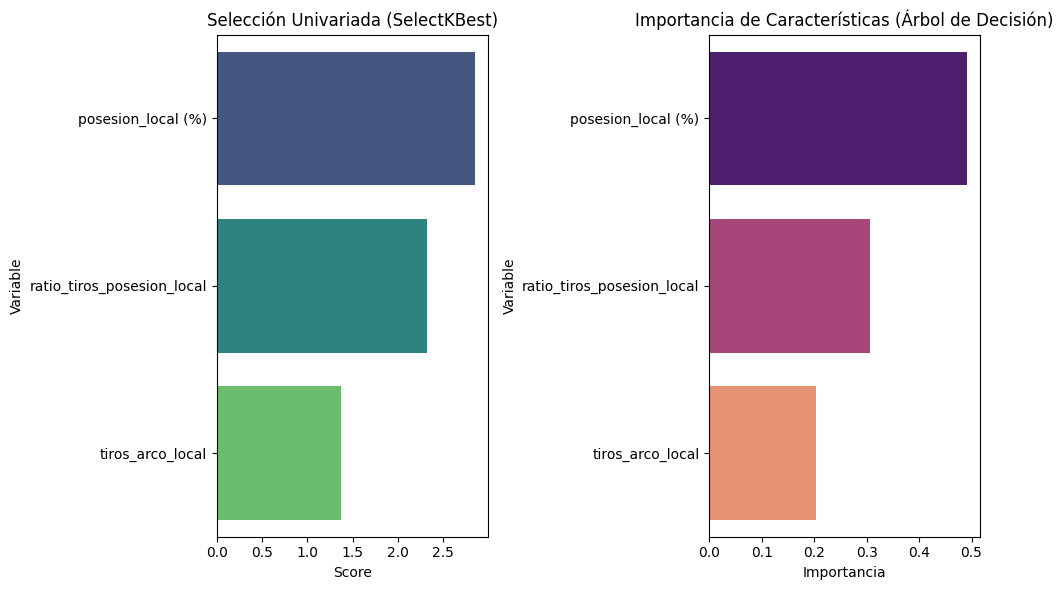

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.barplot(x='Score', y='Variable', data=resultados, ax=ax[0], palette='viridis')
ax[0].set_title('Selección Univariada (SelectKBest)')

sns.barplot(x='Importancia', y='Variable', data=resultados_importancia, ax=ax[1], palette='magma')
ax[1].set_title('Importancia de Características (Árbol de Decisión)')   

plt.tight_layout()
plt.show()